2.718281828459045
4.539786870243442e-05
0.5


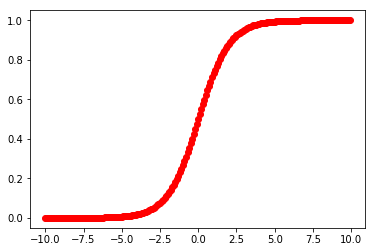

In [5]:
import math
import matplotlib.pyplot as plt
print(math.e) #자연상수e
def sigmoid(z):
    return 1. / (1+math.e**-z)
print(sigmoid(-10)) #wx+b=-10으로 나올 때 ->sigmpoid함수에 의해 0에 가까운 값
print(sigmoid(0))
for i in range(-100,100):
    z=i/10
    s=sigmoid(z)
    plt.plot(z,s,'ro') #->sigmoid함수

### 수능점수 예측기 
case1.variable이 수없이 많으면 의미없는 코딩임

In [29]:
#multi-variable(features 3개) linear regression

import tensorflow as tf
tf.set_random_seed(777)
x1_data=[273,293,286,296,277] #3월
x2_data=[233,273,280,275,280] #6월
x3_data=[253,290,286,294,267] #9월 모의 점수
y_data=[246,300,310,269,298]
x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

w1=tf.Variable(tf.random_normal([1])) #갱신대상
w2=tf.Variable(tf.random_normal([1]))
w3=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))

hf=x1*w1+x2*w2+x3*w3+b
cost=tf.reduce_mean(tf.square(hf-y))
optimizer=tf.train.GradientDescentOptimizer(4e-6)
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    _, cv, hv=sess.run([train,cost, hf], feed_dict={x1:x1_data, x2:x2_data, x3:x3_data,y:y_data}) #train을 실행해야한다.
    #값이 없는 train은 under bar(_)처리!!!
    #cv=sess.run(cost, feed_dict={x1:x1_data, x2:x2_data, x3:x3_data,y:y_data})
    if step%20==0:
        print (step,"비용:",cv)
        print (step,"예측:",hv) #hf라는 모델 형성

0 비용: 1384.154
0 예측: [281.5587  330.33582 323.26093 336.05505 290.00897]
20 비용: 597.62335
20 예측: [256.6147 302.6234 296.0275 308.0135 264.0695]
40 비용: 583.067
40 예측: [255.25423 301.47702 295.21622 306.8187  263.66782]
60 비용: 570.03284
60 예측: [254.76436 301.30276 295.36563 306.60693 264.18866]
80 비용: 557.4713
80 예측: [254.3157  301.16608 295.54617 306.43362 264.73355]
100 비용: 545.36414
100 예측: [253.8777  301.0327  295.72394 306.26428 265.26984]
120 비용: 533.6961
120 예측: [253.4492  300.90164 295.89786 306.0978  265.7966 ]
140 비용: 522.4474
140 예측: [253.02989 300.77258 296.068   305.9339  266.31393]
160 비용: 511.60382
160 예측: [252.61969 300.64572 296.2344  305.77267 266.8221 ]
180 비용: 501.15
180 예측: [252.21815 300.5206  296.39694 305.6138  267.321  ]
200 비용: 491.0712
200 예측: [251.8254  300.39752 296.55597 305.45752 267.8111 ]
220 비용: 481.3523
220 예측: [251.44109 300.27646 296.71143 305.30365 268.29245]
240 비용: 471.98016
240 예측: [251.06519 300.15732 296.8635  305.15228 268.76535]
260 비용: 462.94

### case2 일반적인 코딩

In [32]:
#multi-variable(features 3개) linear regression
#
import tensorflow as tf
tf.set_random_seed(777)
x_data=[[273,233,253], #행은 학생,열은 달별모의성적
        [293,273,290],
        [286,280,286],
        [296,275,294],
        [277,280,267]] 
y_data=[[246],
        [300],
        [310],
        [280],
        [298]]
#가벽적 데이터반영을 위해 none,feature의 개수는 일반적으로 고정
x=tf.placeholder(tf.float32, shape=[None,3]) 
y=tf.placeholder(tf.float32, shape=[None,1])
                              # x,y
w=tf.Variable(tf.random_normal([3,1])) #갱신대상
b=tf.Variable(tf.random_normal([1]))
hf=tf.matmul(x,w)+b

cost=tf.reduce_mean(tf.square(hf-y))
optimizer=tf.train.GradientDescentOptimizer(4e-6)
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    _, cv, hv=sess.run([train,cost, hf], feed_dict={x:x_data, y:y_data}) #train을 실행해야한다.
    #값이 없는 train은 under bar(_)처리!!!
    #cv=sess.run(cost, feed_dict={x1:x1_data, x2:x2_data, x3:x3_data,y:y_data})
    if step%20==0:
        print (step,"비용:",cv)
        print (step,"예측:",hv) #hf라는 모델 형성

0 비용: 312534.9
0 예측: [[-245.7465 ]
 [-288.5279 ]
 [-280.2278 ]
 [-293.9832 ]
 [-246.67351]]
20 비용: 609.8849
20 예측: [[245.70012]
 [265.48236]
 [271.00925]
 [265.87003]
 [286.25555]]
40 비용: 192.47362
40 예측: [[263.45248]
 [285.70474]
 [291.21667]
 [286.30536]
 [305.80087]]
60 비용: 190.2308
60 예측: [[263.91544]
 [286.44144]
 [292.03738]
 [287.0496 ]
 [306.60257]]
80 비용: 188.58194
80 예측: [[263.7501 ]
 [286.46732]
 [292.14926]
 [287.0757 ]
 [306.71756]]
100 비용: 186.97389
100 예측: [[263.56448]
 [286.46756]
 [292.23392]
 [287.07593]
 [306.80505]]
120 비용: 185.4053
120 예측: [[263.38104]
 [286.46735]
 [292.31656]
 [287.076  ]
 [306.88928]]
140 비용: 183.873
140 예측: [[263.20032]
 [286.46762]
 [292.398  ]
 [287.0765 ]
 [306.97116]]
160 비용: 182.37755
160 예측: [[263.02237]
 [286.4683 ]
 [292.47824]
 [287.0776 ]
 [307.0507 ]]
180 비용: 180.91653
180 예측: [[262.84705]
 [286.4693 ]
 [292.55725]
 [287.079  ]
 [307.12787]]
200 비용: 179.49008
200 예측: [[262.6744 ]
 [286.47073]
 [292.63516]
 [287.0811 ]
 [307.20294]]
2

### case3. file 불러오기

In [47]:
#multi-variable(features 3개) linear regression
#
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)
xy=np.loadtxt('data/data-01-test-score.csv',
           delimiter=",",dtype=np.float32)
print(xy)
print(len(xy)) #꼭 잘 읽어졌는지 확인
x_data=xy[:,0:-1]#행,열
y_data=xy[:,[-1]]
print(x_data.shape)
print(y_data.shape)
print(y)
#가변적 데이터반영을 위해 none,feature의 개수는 일반적으로 고정
x=tf.placeholder(tf.float32, shape=[None,3]) 
y=tf.placeholder(tf.float32, shape=[None,1])
                              # x,y
w=tf.Variable(tf.random_normal([3,1])) #갱신대상
b=tf.Variable(tf.random_normal([1]))
hf=tf.matmul(x,w)+b

cost=tf.reduce_mean(tf.square(hf-y))
optimizer=tf.train.GradientDescentOptimizer(4e-6)
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
    _, cv, hv=sess.run([train,cost, hf], feed_dict={x:x_data, y:y_data}) #train을 실행해야한다.
    #값이 없는 train은 under bar(_)처리!!!
    #cv=sess.run(cost, feed_dict={x1:x1_data, x2:x2_data, x3:x3_data,y:y_data})
    if step%20==0:
        print (step,"비용:",cv)
        print (step,"예측:",hv) #hf라는 모델 형성
print("예상 점수: ", sess.run(hf,feed_dict={x:[[100,70,102]]}))#100 70 102점일 때 
#두 사람의 점수가 궁금할 때
print("A와 B의 예상 점수: ", sess.run(hf,feed_dict={x:[[60,70,100],[100,70,102]]}))

[[ 80.  79.  77. 149.]
 [ 93.  88.  93. 185.]
 [ 89.  91.  90. 180.]
 [ 96.  98. 100. 196.]
 [ 73.  66.  70. 142.]
 [ 53.  46.  55. 101.]
 [ 69.  74.  77. 149.]
 [ 47.  56.  60. 115.]
 [ 87.  79.  90. 175.]
 [ 79.  70.  88. 164.]
 [ 69.  70.  73. 141.]
 [ 70.  65.  74. 141.]
 [ 93.  95.  91. 184.]
 [ 79.  80.  73. 152.]
 [ 70.  73.  78. 148.]
 [ 93.  89.  96. 192.]
 [ 78.  75.  68. 147.]
 [ 81.  90.  93. 183.]
 [ 88.  92.  86. 177.]
 [ 78.  83.  77. 159.]
 [ 82.  86.  90. 177.]
 [ 86.  82.  89. 175.]
 [ 78.  83.  85. 175.]
 [ 76.  83.  71. 149.]
 [ 96.  93.  95. 192.]]
25
(25, 3)
(25, 1)
Tensor("Placeholder_92:0", shape=(?, 1), dtype=float32)
0 비용: 11440.55
0 예측: [[59.132996]
 [65.467995]
 [64.7052  ]
 [68.19356 ]
 [51.66779 ]
 [34.2559  ]
 [47.361664]
 [30.03693 ]
 [58.255997]
 [48.70837 ]
 [48.001972]
 [46.404346]
 [69.28476 ]
 [60.822346]
 [47.31808 ]
 [64.21074 ]
 [60.729214]
 [55.522717]
 [66.39455 ]
 [58.899994]
 [56.507965]
 [59.076595]
 [54.511276]
 [60.404488]
 [68.99394 ]]
20

460 비용: 51.568222
460 예측: [[162.41661 ]
 [185.8775  ]
 [183.16078 ]
 [197.46504 ]
 [143.3607  ]
 [102.302635]
 [144.42984 ]
 [102.41286 ]
 [171.18425 ]
 [153.92041 ]
 [141.34554 ]
 [138.68504 ]
 [191.4002  ]
 [161.97888 ]
 [144.90929 ]
 [186.62076 ]
 [156.84514 ]
 [172.10728 ]
 [182.72305 ]
 [162.99986 ]
 [170.28741 ]
 [172.27477 ]
 [162.8886  ]
 [160.52661 ]
 [193.60966 ]]
480 비용: 51.309185
480 예측: [[162.39967]
 [185.87689]
 [183.1528 ]
 [197.46742]
 [143.35423]
 [102.31642]
 [144.44456]
 [102.4415 ]
 [171.20013]
 [153.96071]
 [141.35208]
 [138.70131]
 [191.38083]
 [161.94774]
 [144.92719]
 [186.62953]
 [156.80594]
 [172.12903]
 [182.70087]
 [162.98067]
 [170.30254]
 [172.28421]
 [162.89879]
 [160.48964]
 [193.6018 ]]
500 비용: 51.051792
500 예측: [[162.3828 ]
 [185.87628]
 [183.14484]
 [197.4698 ]
 [143.34776]
 [102.33015]
 [144.45924]
 [102.47007]
 [171.21594]
 [154.00087]
 [141.35864]
 [138.7175 ]
 [191.3615 ]
 [161.91673]
 [144.94502]
 [186.63829]
 [156.76686]
 [172.15074]
 [182.67879

980 비용: 45.33911
980 예측: [[161.9929 ]
 [185.85913]
 [182.96242]
 [197.5255 ]
 [143.19458]
 [102.64263]
 [144.80063]
 [103.13378]
 [171.57593]
 [154.92181]
 [141.50989]
 [139.08812]
 [190.91705]
 [161.20183]
 [145.35806]
 [186.83755]
 [155.86404]
 [172.65614]
 [182.17134]
 [162.52338]
 [170.66768]
 [172.5081 ]
 [163.14635]
 [159.60738]
 [193.41208]]
1000 비용: 45.1194
1000 예측: [[161.97726]
 [185.85834]
 [182.95517]
 [197.52776]
 [143.18828]
 [102.65496]
 [144.81439]
 [103.16054]
 [171.59013]
 [154.95845]
 [141.51598]
 [139.10283]
 [190.89932]
 [161.17326]
 [145.37466]
 [186.84544]
 [155.82785]
 [172.67657]
 [182.15114]
 [162.50595]
 [170.68176]
 [172.51659]
 [163.15596]
 [159.5737 ]
 [193.40472]]
1020 비용: 44.90104
1020 예측: [[161.9617 ]
 [185.85751]
 [182.94794]
 [197.53003]
 [143.182  ]
 [102.66725]
 [144.82814]
 [103.18724]
 [171.6043 ]
 [154.99496]
 [141.52203]
 [139.11748]
 [190.88164]
 [161.14476]
 [145.39122]
 [186.85329]
 [155.79176]
 [172.69695]
 [182.131  ]
 [162.4886 ]
 [170.6958

1580 비용: 39.31255
1580 예측: [[161.54433]
 [185.83212]
 [182.75592]
 [197.59195]
 [143.0088 ]
 [102.99071]
 [145.19893]
 [103.90735]
 [171.97696]
 [155.9645 ]
 [141.68457]
 [139.50563]
 [190.4102 ]
 [160.38356]
 [145.83565]
 [187.06006]
 [154.82463]
 [173.24815]
 [181.59515]
 [162.02802]
 [171.07446]
 [172.74805]
 [163.4254 ]
 [158.64801]
 [193.199  ]]
1600 비용: 39.130527
1600 예측: [[161.53008]
 [185.83113]
 [182.74944]
 [197.59412]
 [143.00273]
 [103.00156]
 [145.21169]
 [103.93212]
 [171.98947]
 [155.99731]
 [141.69014]
 [139.51874]
 [190.39418]
 [160.35765]
 [145.85089]
 [187.06702]
 [154.7916 ]
 [173.26717]
 [181.57701]
 [162.01247]
 [171.08748]
 [172.75555]
 [163.4344 ]
 [158.61778]
 [193.19217]]
1620 비용: 38.949657
1620 예측: [[161.51585]
 [185.83012]
 [182.74295]
 [197.59627]
 [142.99664]
 [103.01235]
 [145.22441]
 [103.95682]
 [172.00189]
 [156.03   ]
 [141.69566]
 [139.53178]
 [190.3782 ]
 [160.3318 ]
 [145.86606]
 [187.07391]
 [154.75864]
 [173.28613]
 [181.5589 ]
 [161.99692]
 [171